In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, IntSlider

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
# Tampilkan jumlah nilai unik untuk setiap fitur
unique_value_counts = df.nunique()
print(unique_value_counts)

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64


In [5]:
# Ringkasan statistik dari dataframe
summary = df.describe()

# Tampilkan ringkasan statistik
summary

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


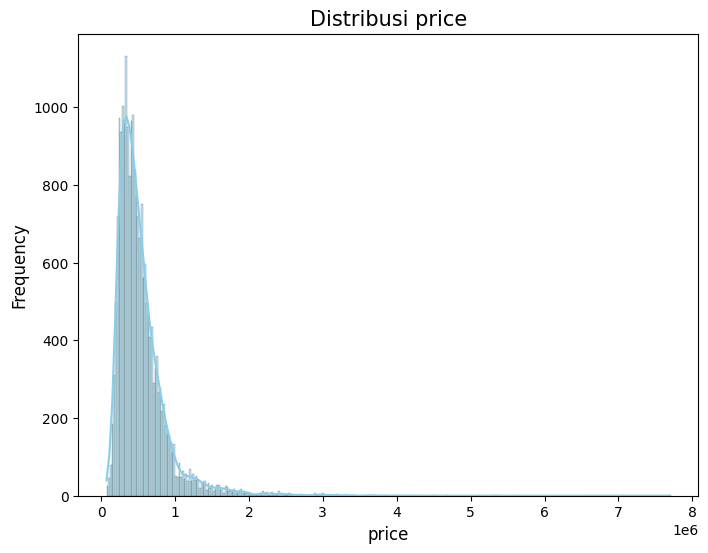

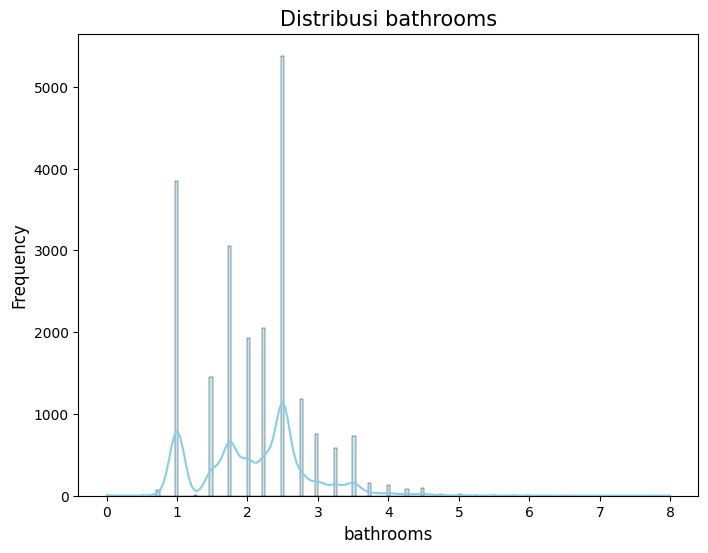

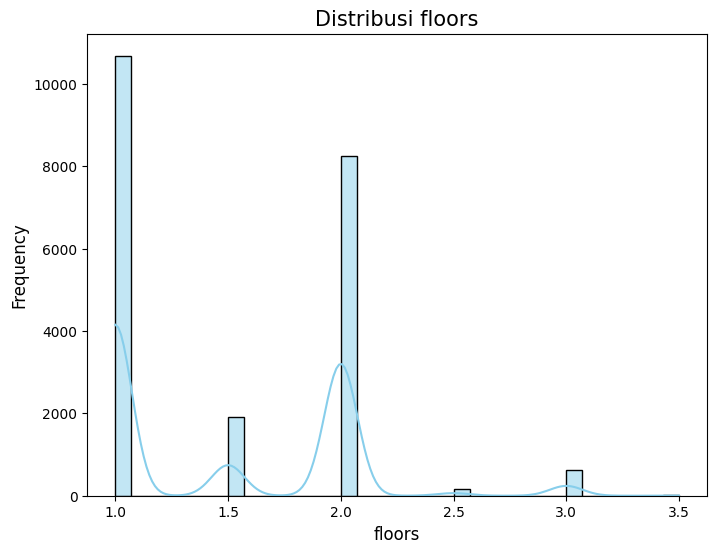

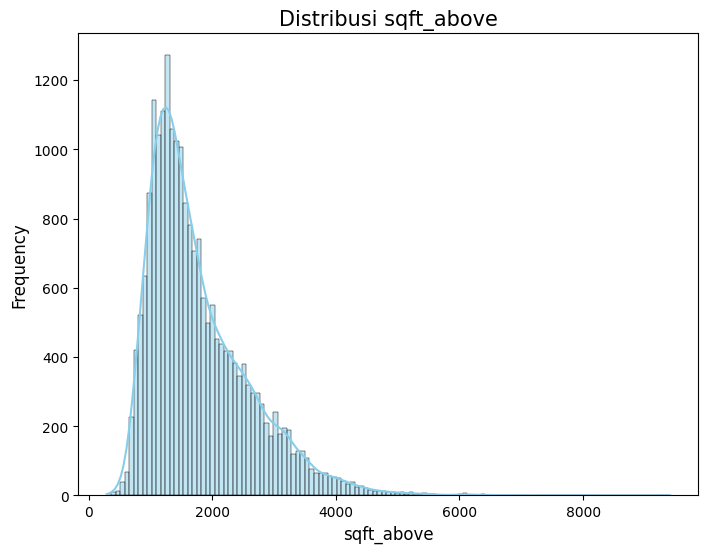

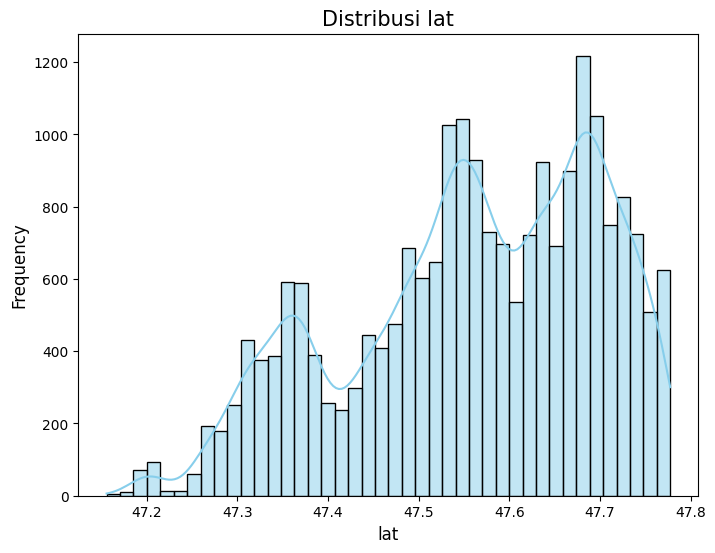

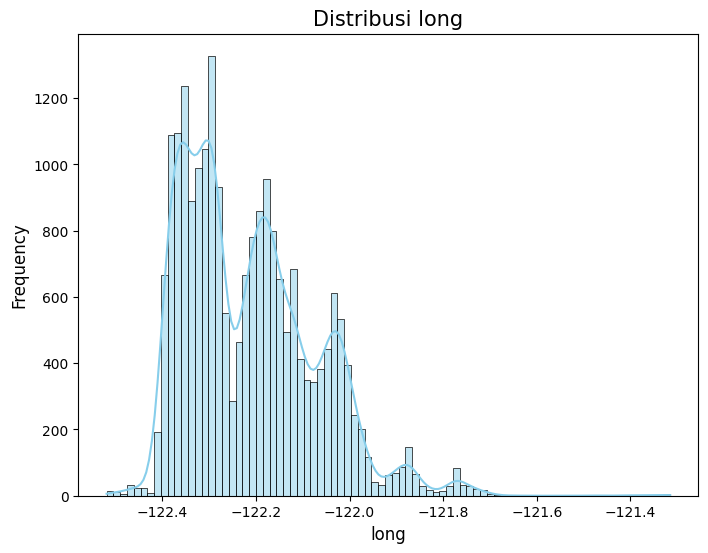

In [6]:
# Visualisasi distribusi untuk setiap fitur
for column in df.columns:
    if df[column].dtype == 'float64':
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, color='skyblue')
        plt.title(f'Distribusi {column}', size=15)
        plt.xlabel(column, size=12)
        plt.ylabel('Frequency', size=12)
        plt.show()

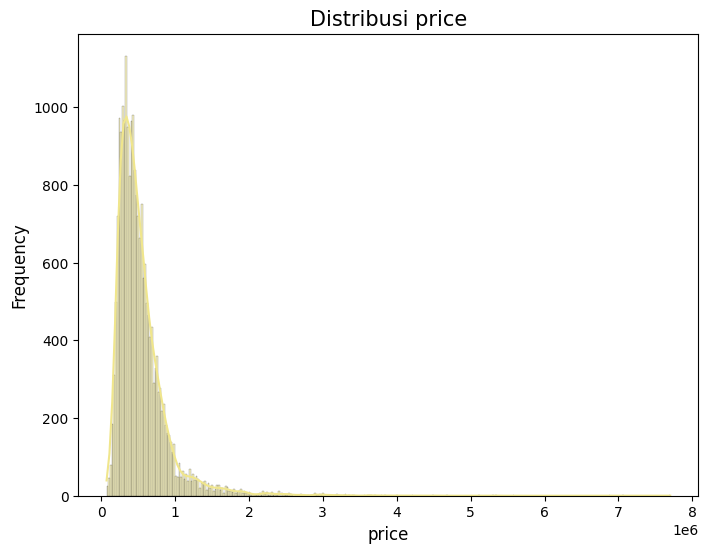

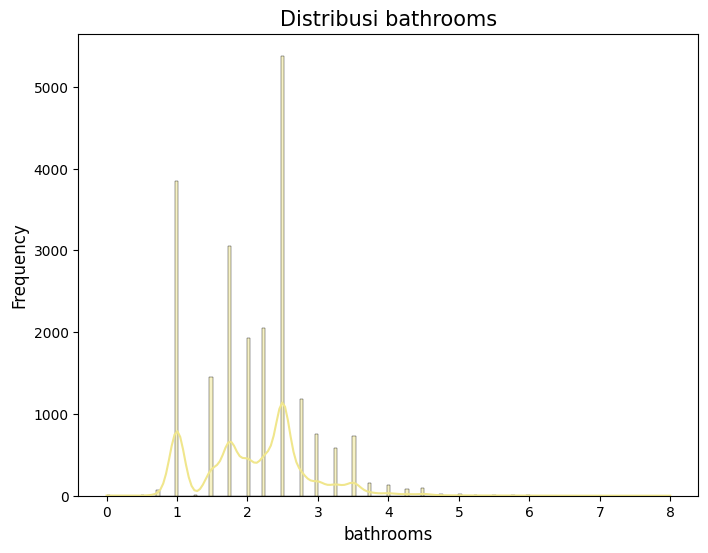

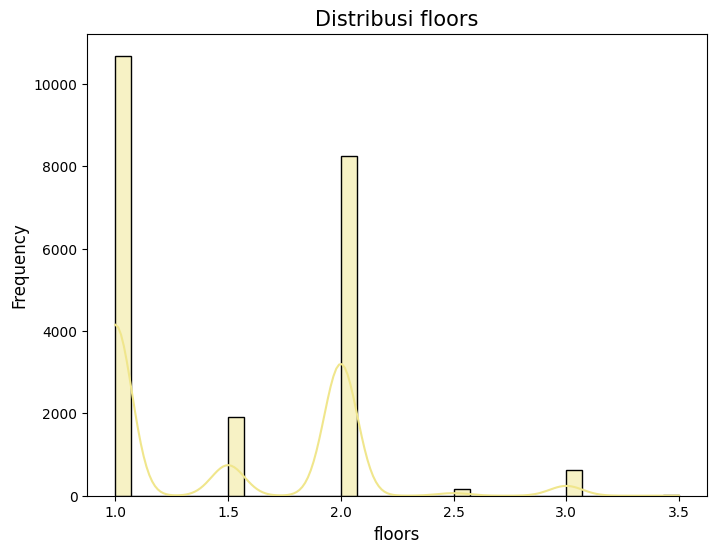

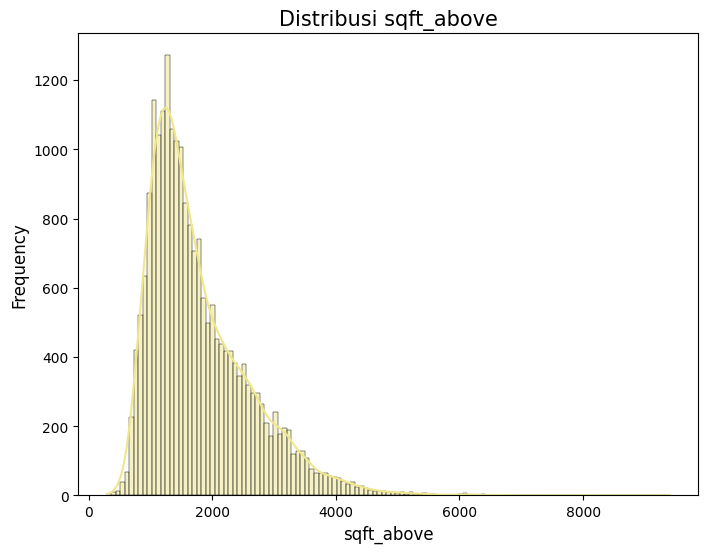

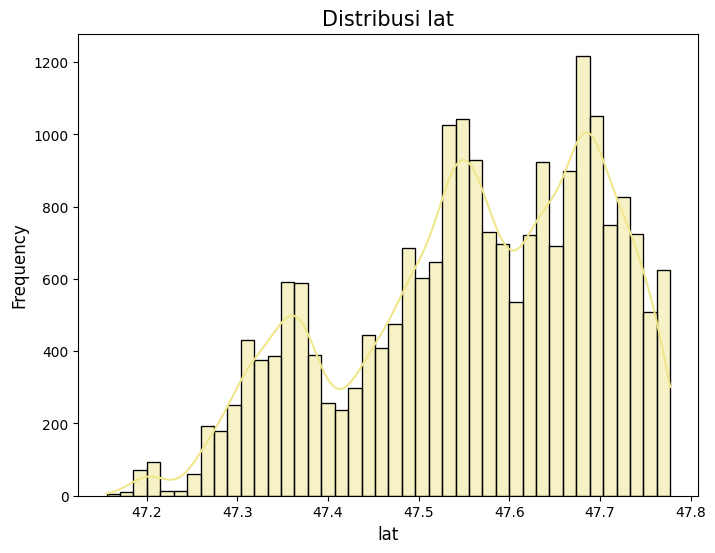

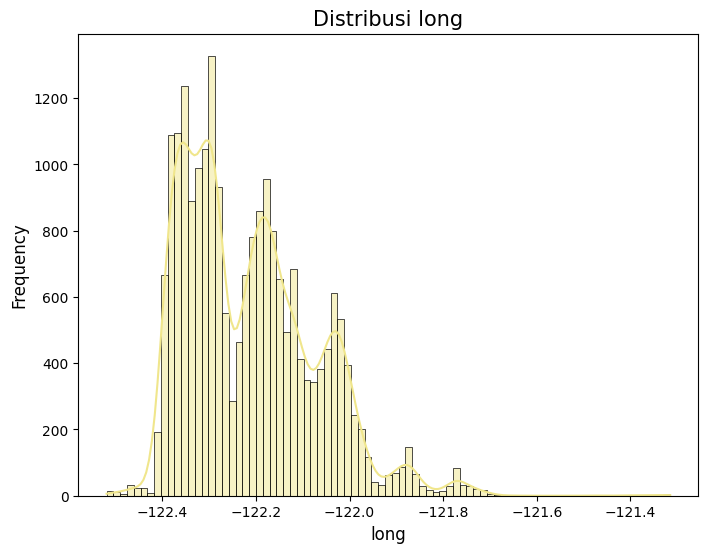

In [7]:
# Visualisasi distribusi untuk setiap fitur
for column in df.columns:
    if df[column].dtype == 'float64':
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True, color='khaki')  # Ubah warna menjadi khaki
        plt.title(f'Distribusi {column}', size=15)
        plt.xlabel(column, size=12)
        plt.ylabel('Frequency', size=12)
        plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 3

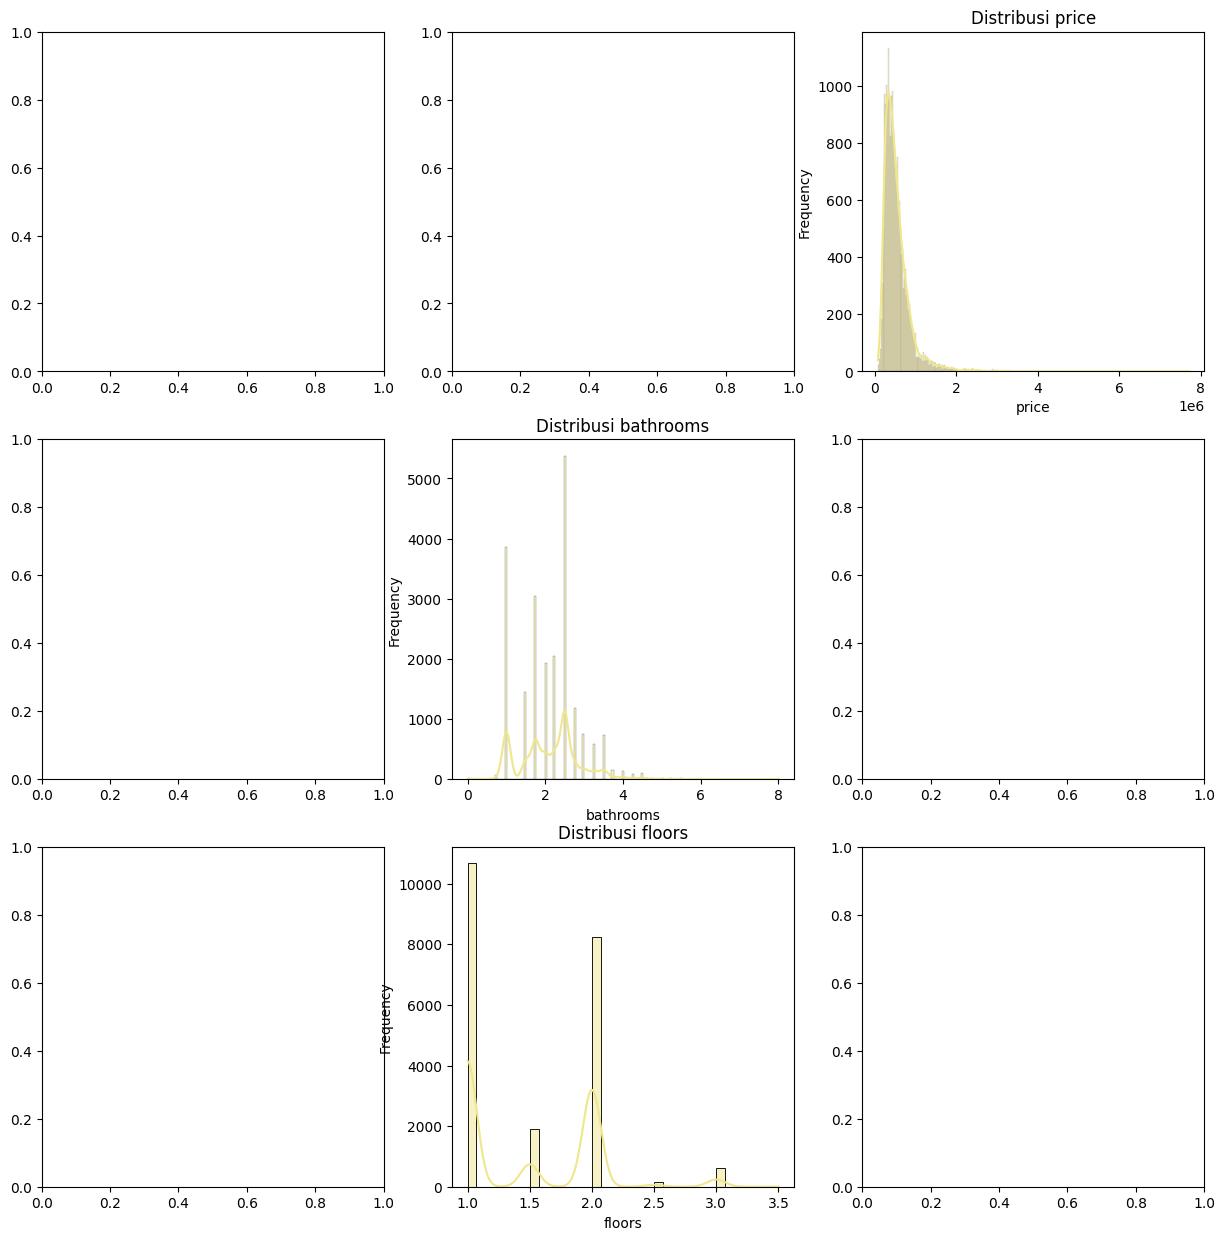

In [8]:
# Mengatur ukuran dan tata letak subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Visualisasi distribusi untuk setiap fitur dalam tata letak 3x3
for i, column in enumerate(df.columns):
    if df[column].dtype == 'float64':
        sns.histplot(df[column], kde=True, color='khaki', ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f'Distribusi {column}', size=12)
        axes[i//3, i%3].set_xlabel(column, size=10)
        axes[i//3, i%3].set_ylabel('Frequency', size=10)

# Mengatur tata letak secara rapi
plt.tight_layout()
plt.show()

In [9]:
# Fungsi untuk memplot distribusi dengan bin width interaktif
def plot_distribution(feature, bin_width):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=bin_width, kde=True, color='khaki')
    plt.title(f'Distribusi {feature} (Bin Width: {bin_width})', size=15)
    plt.xlabel(feature, size=12)
    plt.ylabel('Frequency', size=12)
    plt.show()

# Interaksi untuk memilih fitur dan bin width
interact(plot_distribution, feature=df.columns, bin_width=IntSlider(min=1, max=50, step=1, value=10))

interactive(children=(Dropdown(description='feature', options=('id', 'date', 'price', 'bedrooms', 'bathrooms',…

<function __main__.plot_distribution(feature, bin_width)>

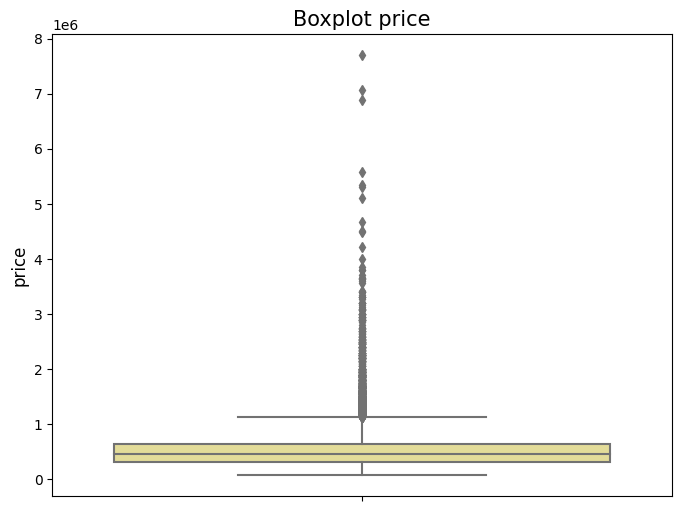

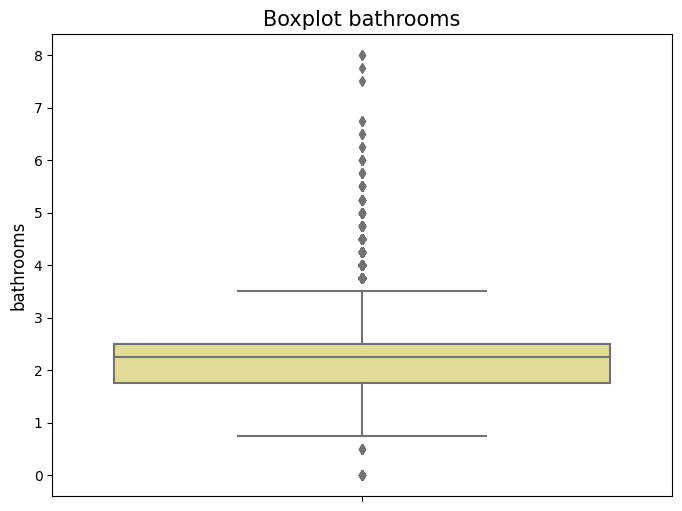

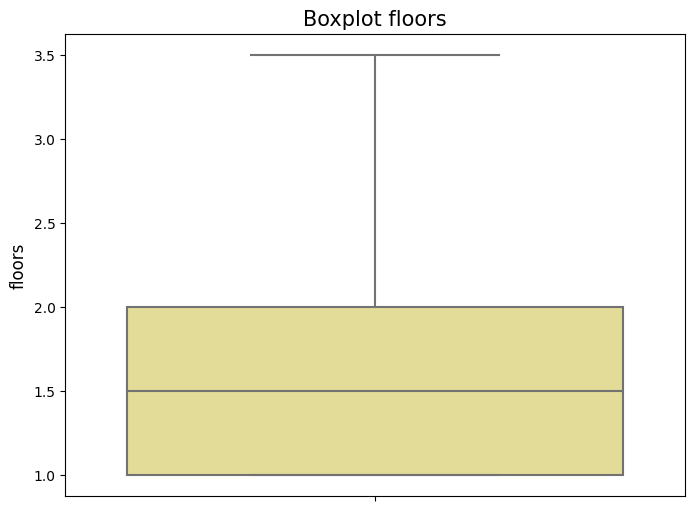

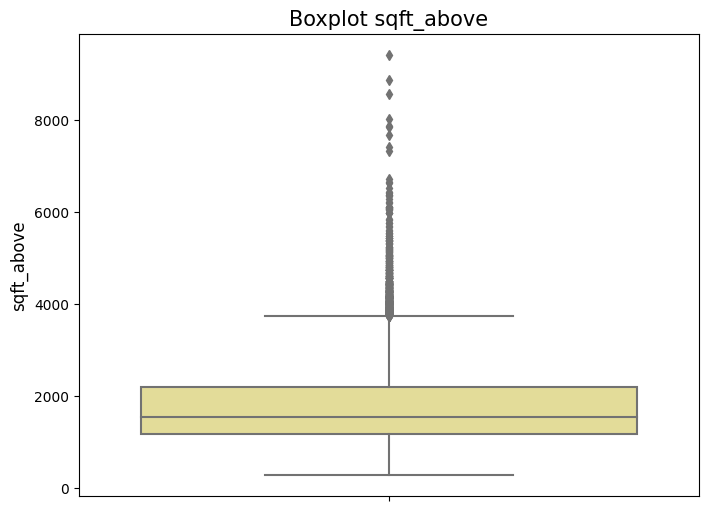

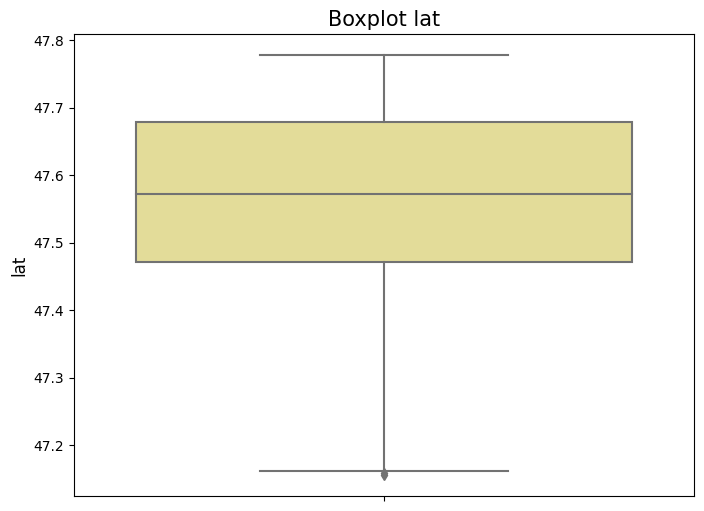

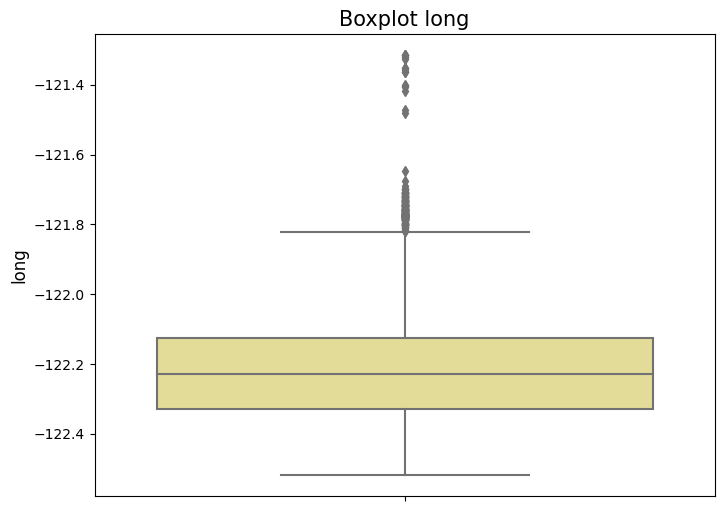

In [10]:
# Visualisasi boxplot untuk setiap fitur
for column in df.columns:
    if df[column].dtype == 'float64':
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[column], color='khaki')
        plt.title(f'Boxplot {column}', size=15)
        plt.ylabel(column, size=12)
        plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 3

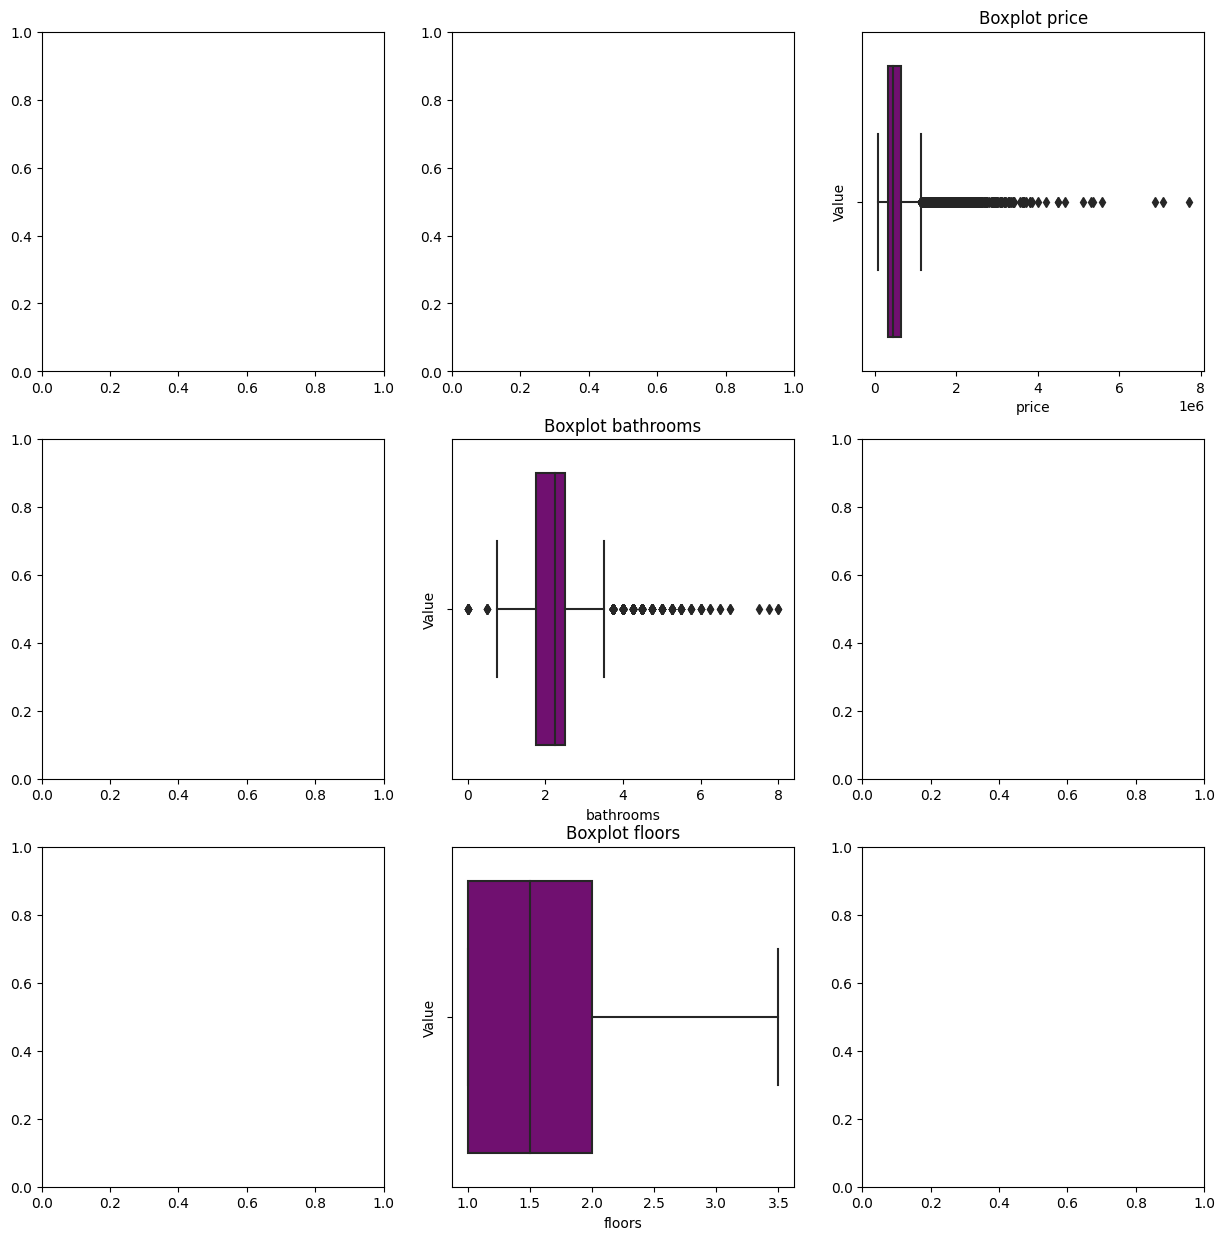

In [11]:
# Mengatur ukuran dan tata letak subplot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Visualisasi boxplot untuk setiap fitur dalam tata letak 3x3
for i, column in enumerate(df.columns):
    if df[column].dtype == 'float64':
        sns.boxplot(x=df[column], color='purple', orient='h', ax=axes[i//3, i%3])
        axes[i//3, i%3].set_title(f'Boxplot {column}', size=12)
        axes[i//3, i%3].set_xlabel(column, size=10)
        axes[i//3, i%3].set_ylabel('Value', size=10)

# Mengatur tata letak secara rapi
plt.tight_layout()
plt.show()

In [12]:
# Membuat scatter plot untuk setiap pasang fitur
sns.set(style="ticks")
sns.pairplot(df, kind="scatter", diag_kind="kde", palette="husl")
plt.show()

c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\LEGION\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been as

KeyboardInterrupt: 

C:\Users\LEGION\AppData\Local\Temp\ipykernel_17376\2338498974.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)


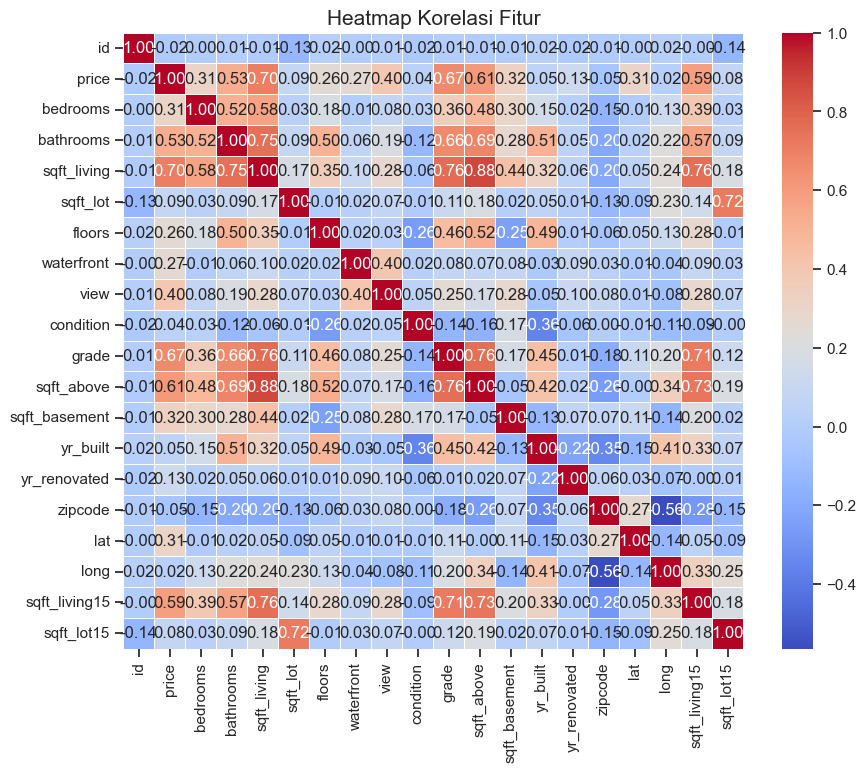

In [13]:
# Membuat heatmap untuk setiap fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur', size=15)
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 13

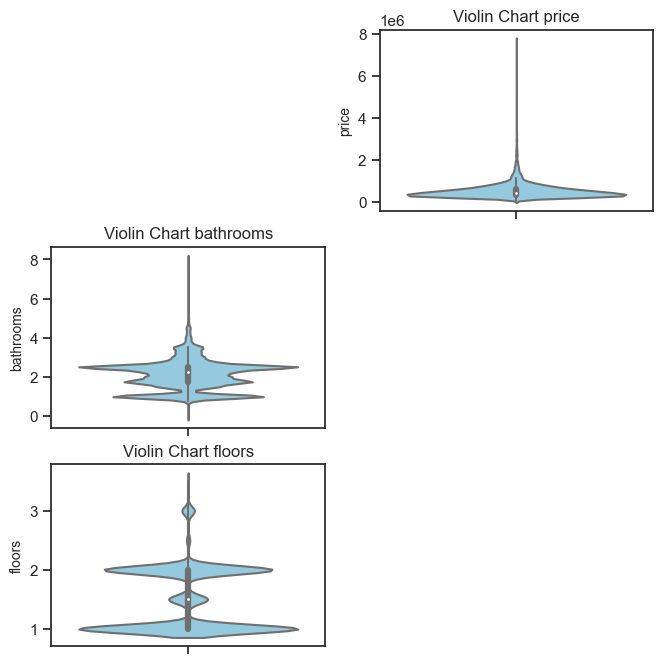

In [14]:
# Mengatur tata letak secara rapi
plt.figure(figsize=(12, 8))

# Membuat violin chart untuk setiap fitur
for i, column in enumerate(df.columns):
    if df[column].dtype == 'float64':
        plt.subplot(3, 3, i+1)
        sns.violinplot(y=df[column], color='skyblue')
        plt.title(f'Violin Chart {column}', size=12)
        plt.ylabel(column, size=10)

# Menampilkan plot
plt.tight_layout()
plt.show()